

## Assignment 2: Data, Grammar and Engineering

**AMS MADE YMS31303**<br>
**Q1 2024**<br>
**Instructor:** Theodoros Chatzivasileiadis <br>
**Instructor:** Hans Hoogenboom <br>
**TA:** Ka Yi Chua <br>
**[Metropolitan Data 1](https://jhoogenboom.github.io/spatial-data-science/_index.html)** <br>

---



## Question 1

We will work with data from the Guardian's version of [Wikileaks' Afghanistan war logs](http://www.theguardian.com/news/datablog/2010/jul/27/wikileaks-afghanistan-data-datajournalism). The table is stored on a GoogleDoc on the following address:

> [https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1](https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1)

Write a Python code snippet using IPython.display to embed this Google Sheet directly into a Jupyter notebook for easy reference and interaction.

In [1]:
%matplotlib inline
import matplotlib
import os            
import pandas as pd   
import numpy as np     
import seaborn as sns  
import os              

google_sheet_url = "https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1"
from IPython.display import HTML, display
iframe = f'''
<iframe src="{google_sheet_url}" width="100%" height="600" style="border: none;"></iframe>
'''
display(HTML(iframe))



## Question 2
a) Save the csv file to your compluter and Load the data in Tab "TOTAL Casualties".

b) Display the first 5 rows of the dataset using .head().

c) Extract the column names and create a dictionary where each column name is the key, and the first value in that column is the value.

In [9]:
%matplotlib inline
import matplotlib
import os            
import pandas as pd   
import numpy as np     
import seaborn as sns  
import os              

# Exercise A
f = 'data/DocsAssignment2/Wikileaks.csv'
db = pd.read_csv(f, skipfooter=1, engine="python")
db = db.set_index(['Year', 'Month'])

# Exercise C
keyvalue_dict = {col: db[col].iloc[0] for col in db.columns}
print(keyvalue_dict)

# Exercise B
db.head(5)


{'Taliban': '15', 'Civilians': '51', 'Afghan forces': '23', 'Nato (detailed in spreadsheet)': nan, 'Nato - official figures': np.float64(11.0)}


Taliban Civilians Afghan forces  \
Year   Month                                      
2004.0 January       15        51            23   
       February     NaN         7             4   
       March         19         2           NaN   
       April          5         3            19   
       May           18        29            56   

                Nato (detailed in spreadsheet)  Nato - official figures  
Year   Month                                                             
2004.0 January                             NaN                     11.0  
       February                              5                      2.0  
       March                                 2                      3.0  
       April                               NaN                      3.0  
       May                                   6                      9.0

## Question 3
a) Plot a histogram of any numeric column from the dataset.

b) Use a kernel density plot (KDE) to visualize the distribution of another numeric column.

c) Create a bar chart of a categorical variable and discuss how the plot changes if you switch to a horizontal bar plot.

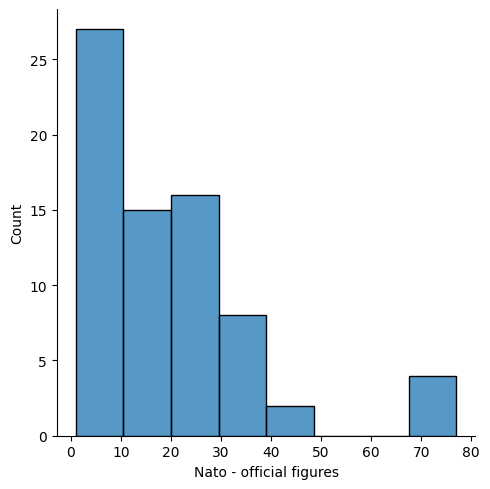

In [40]:
%matplotlib inline
import matplotlib
import os            
import pandas as pd   
import numpy as np     
import seaborn as sns  
import os     
import matplotlib.pyplot as plt

# Exercise A
_ = sns.displot(db['Nato - official figures'], kde=False)


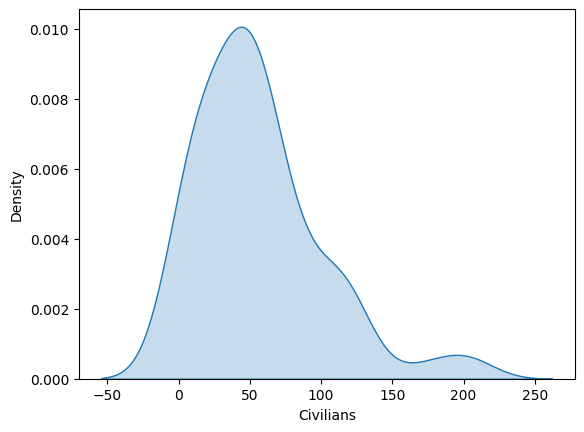

In [15]:
%matplotlib inline
import matplotlib
import os            
import pandas as pd   
import numpy as np     
import seaborn as sns  
import os     
import matplotlib.pyplot as plt

# Exercise B
db['Civilians'] = pd.to_numeric(db['Civilians'], errors='coerce')
_ = sns.kdeplot(db['Civilians'], fill=True)





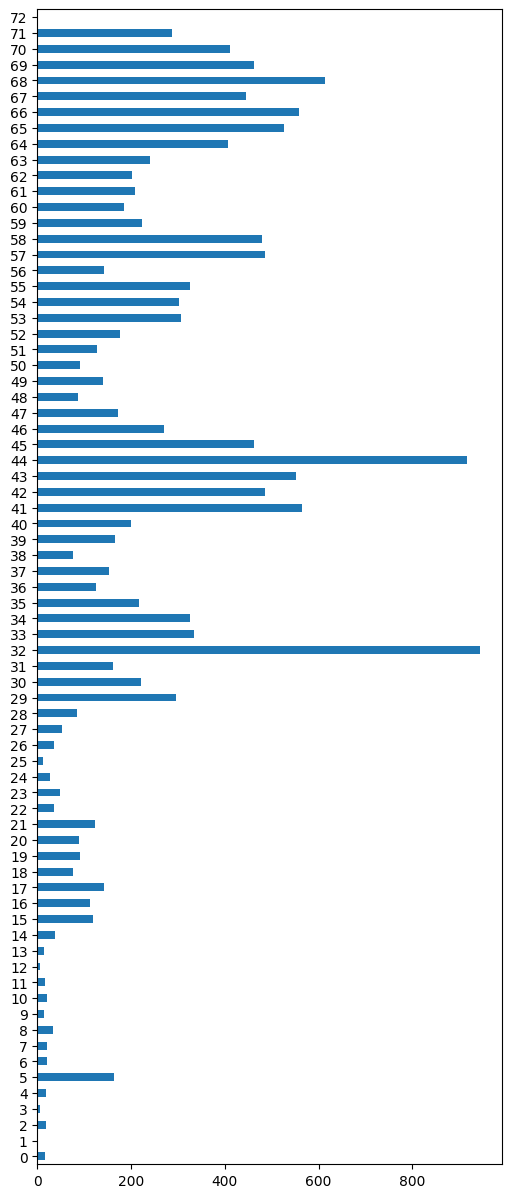

In [5]:
%matplotlib inline
import matplotlib
import os            
import pandas as pd   
import numpy as np     
import seaborn as sns  
import os     
import matplotlib.pyplot as plt

# Exercise C
db['Taliban'] = pd.to_numeric(db['Taliban'], errors='coerce')
_ = db['Taliban'].plot(kind='barh', figsize=(6, 15))

# If we switch to a horizontal bar plot by deleting the "h" within "barh", we see that the due to the large number of months,
# the horizontal axis becomes unreadable. Code below:
# db['Taliban'] = pd.to_numeric(db['Taliban'], errors='coerce')
# _ = db['Taliban'].plot(kind='bar', figsize=(6, 15))

## Question 4
a) Write a loop that iterates through each row of a DataFrame and prints the value of one specific column.

b) Modify the loop so that it extracts rows where a numeric column value is greater than a threshold and stores these rows in a new DataFrame.

In [42]:
%matplotlib inline
import matplotlib
import os            
import pandas as pd   
import numpy as np     
import seaborn as sns  
import os     
import matplotlib.pyplot as plt

# Exercise A
f = 'data/DocsAssignment2/Wikileaks.csv'
db = pd.read_csv(f, skipfooter=1, engine="python")
db = db.set_index(['Year', 'Month'])
value = db.iloc[5]['Taliban']
print(value)

# Exercise B
filteredrows = []
for index, row in db.iterrows():
    if float(row['Taliban']) > 200:
        filteredrows.append(row)

filtered_db = pd.DataFrame(filteredrows)
print(filtered_db)

163.0
                Taliban  Civilians  Afghan forces  \
2006 June         295.0       71.0           39.0   
     July         220.0       64.0           36.0   
     September    945.0      172.0           97.0   
     October      333.0       44.0           70.0   
     November     325.0       46.0           14.0   
     December     216.0       51.0           36.0   
2007 June         564.0       80.0           98.0   
     July         485.0       83.0          114.0   
     August       551.0       65.0           89.0   
     September    917.0       64.0          144.0   
     October      462.0       46.0           75.0   
     November     270.0       60.0           67.0   
2008 June         306.0       51.0           58.0   
     July         303.0      120.0          100.0   
     August       326.0       46.0           61.0   
     October      485.0       56.0           54.0   
     November     479.0       78.0           68.0   
     December     223.0       76.0      

## Question 5
a) Create a list containing the names "Civilians" and "Afghan forces"

b) From the imported data keep the the values from these two columns only. Keep in mind that "Year" and "Month" identify each column and sould remain in the dataset.

c) Obtain a monthly total count of casualties for these two groups and create a line and a bar plot of them.


In [4]:
%matplotlib inline
import matplotlib
import os            
import pandas as pd   
import numpy as np     
import seaborn as sns  
import os     
import matplotlib.pyplot as plt

# Exercise A
f = 'data/DocsAssignment2/Wikileaks.csv'
ListHeaders = list(db)
newlist = [ListHeaders[1], ListHeaders[2]]
print(newlist)

# Exercise B
db = pd.read_csv(f, skipfooter=1, engine="python")
db = db.set_index(['Year', 'Month'])
db_new = db.drop(columns=["Taliban", "Nato (detailed in spreadsheet)", "Nato - official figures"])
print(db_new)


['Civilians', 'Afghan forces']
                Civilians  Afghan forces
Year Month                              
2004 January           51           23.0
     February           7            4.0
     March              2            NaN
     April              3           19.0
     May               29           56.0
...                   ...            ...
2009 August           206          190.0
     September        197          133.0
     October          107           86.0
     November         120           69.0
     December          87           65.0

[72 rows x 2 columns]


                Civilians  Afghan forces  total_civilians_afghan
Year Month                                                      
2004 January           51           23.0                    74.0
     February           7            4.0                    11.0
     March              2            NaN                     NaN
     April              3           19.0                    22.0
     May               29           56.0                    85.0
...                   ...            ...                     ...
2009 August           206          190.0                   396.0
     September        197          133.0                   330.0
     October          107           86.0                   193.0
     November         120           69.0                   189.0
     December          87           65.0                   152.0

[72 rows x 3 columns]


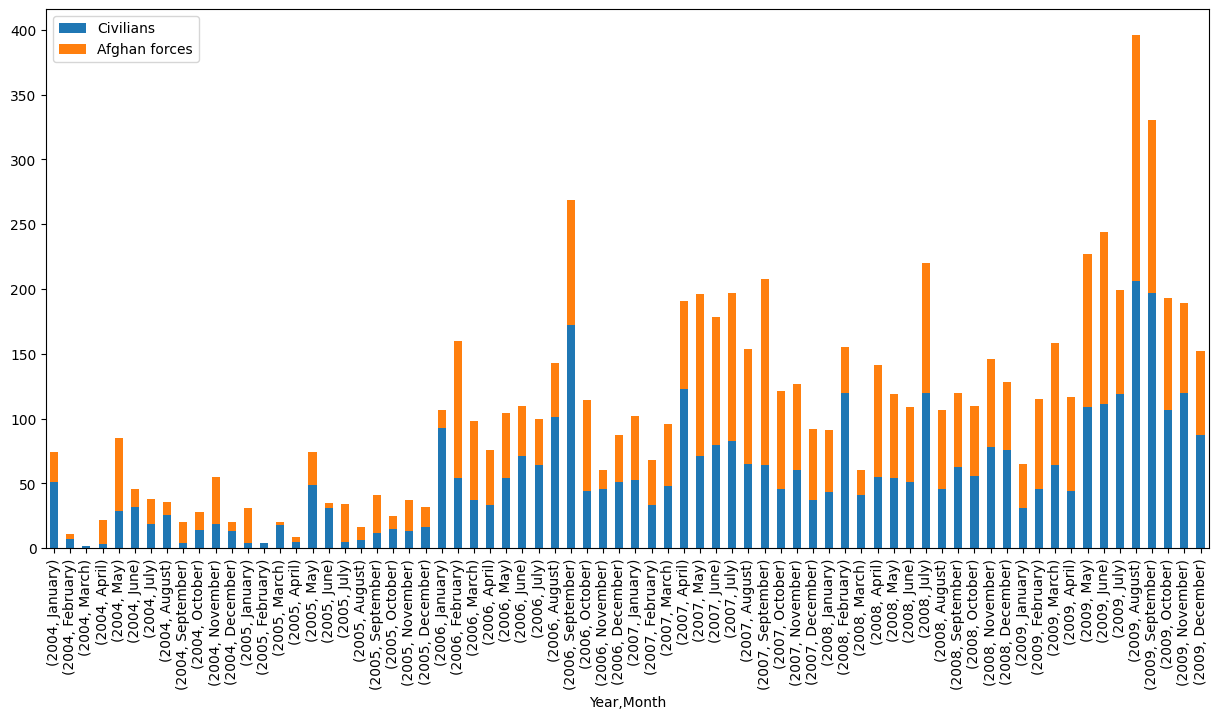

In [7]:
%matplotlib inline
import matplotlib
import os            
import pandas as pd   
import numpy as np     
import seaborn as sns  
import os     
import matplotlib.pyplot as plt

# Exercise C
f = 'data/DocsAssignment2/Wikileaks.csv'
db = pd.read_csv(f, skipfooter=1, engine="python")
db = db.set_index(['Year', 'Month'])
db_new = db.drop(columns=["Taliban", "Nato (detailed in spreadsheet)", "Nato - official figures"])
db_new["total_civilians_afghan"] = db[newlist[0]] + db[newlist[1]]
print(db_new)

# bar plot
ListHeaders = list(db)
newlist = [ListHeaders[3], ListHeaders[4]]
_ = db_new[['Civilians', 'Afghan forces']].plot(kind='bar', figsize=(15,7), stacked=True)

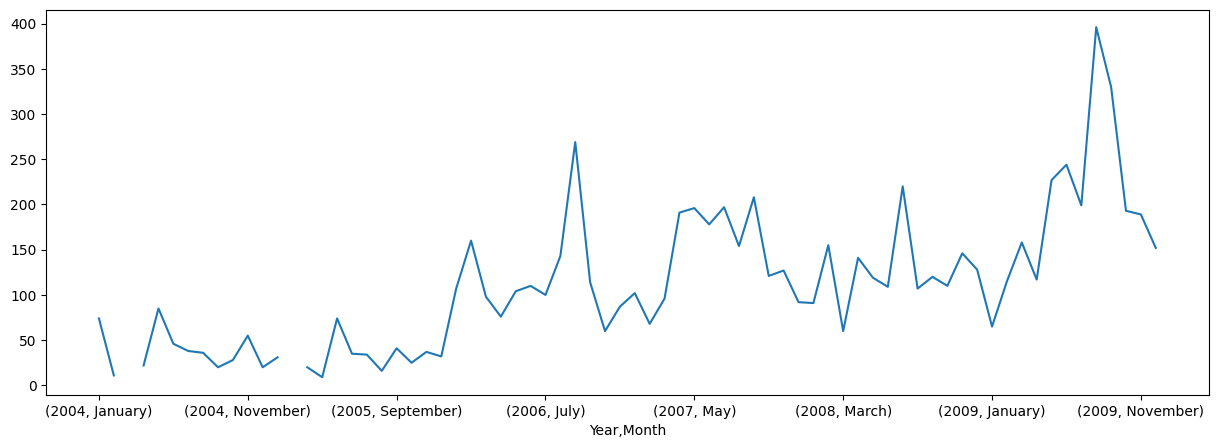

In [6]:
# lineplot
f = 'data/DocsAssignment2/Wikileaks.csv'
ListHeaders = list(db)
newlist = [ListHeaders[1], ListHeaders[2]]
db = pd.read_csv(f, skipfooter=1, engine="python")
db = db.set_index(['Year', 'Month'])
db_new = db.drop(columns=["Taliban", "Nato (detailed in spreadsheet)", "Nato - official figures"])
db_new["total_civilians_afghan"] = db[newlist[0]] + db[newlist[1]]
_ = db_new['total_civilians_afghan'].plot(kind='line', figsize=(15,5))
